In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('final.csv')

In [3]:
df.head()

,image_path,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,...,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,answer_9,answer_10
0,categorized_data/GROCERY/99f7c469.jpg,Are strawberries pictured?,What kind of milk is used?,How many yogurts are shown?,What is the product flavor?,Is this product organic?,What company makes the yogurt?,What color is the strawberry?,Is there yogurt pictured?,What type of food is this?,...,yes,whole,2,strawberry,yes,365,red,yes,yogurt,6
1,categorized_data/GROCERY/34774a00.jpg,How many olive oil containers are there?,Is there a tree on the container?,What is the olive oil's grade?,What color is the olive oil container?,Is the olive oil extra virgin?,What kind of container is it?,Are these containers stacked?,"Can you read ""olive"" on the can?",Is there a lid on the can?,...,4,yes,virgin,blue,yes,can,no,yes,yes,NaN
2,categorized_data/GROCERY/69e3d0a1.jpg,What is the color of the tomatoes?,Is the product ketchup?,What brand is the ketchup?,Is there text on the package?,What color is the writing?,What is the weight in grams?,Is the top red?,Are tomatoes pictured?,What is the product's taste?,...,red,yes,solimo,yes,red,950,yes,yes,rich,NaN
3,categorized_data/GROCERY/6d65e471.jpg,Is there pico de gallo?,What color is the bowl?,Is there cilantro?,What is this item?,Is the pico de gallo fresh?,What shape is the container?,Is there onion in the bowl?,What is the measurement?,NaN,...,yes,white,yes,pico,yes,square,yes,16oz,NaN,NaN
4,categorized_data/GROCERY/129eeb11.jpg,What is the bread packaging made of?,Is the bread organic?,What kind of bread is it?,What is on the bread?,What brand is the bread?,Is this artisan bread?,What is the bread called?,What is the weight?,Is there a bag?,...,plastic,yes,bread,seeds,WFM,yes,Seed,Ounce,yes,yes


In [4]:
# Melt the DataFrame to reshape it for questions and answers
questions = df.filter(like='question_').columns
answers = df.filter(like='answer_').columns

df_melted = pd.melt(df, id_vars=['image_path'], value_vars=questions, 
                    var_name='question_number', value_name='question')
df_melted['answer'] = pd.melt(df, id_vars=['image_path'], value_vars=answers, 
                              value_name='answer')['answer']

# Clean up the question_number column
df_melted['question_number'] = df_melted['question_number'].str.replace('question_', '')

df_melted.head()

,image_path,question_number,question,answer
0,categorized_data/GROCERY/99f7c469.jpg,1,Are strawberries pictured?,yes
1,categorized_data/GROCERY/34774a00.jpg,1,How many olive oil containers are there?,4
2,categorized_data/GROCERY/69e3d0a1.jpg,1,What is the color of the tomatoes?,red
3,categorized_data/GROCERY/6d65e471.jpg,1,Is there pico de gallo?,yes
4,categorized_data/GROCERY/129eeb11.jpg,1,What is the bread packaging made of?,plastic


In [5]:

df_melted.describe()

,image_path,question_number,question,answer
count,407110,407110,368373,368371
unique,37969,10,102619,7871
top,categorized_data/OFFICE_PRODUCTS/577c2a71.jpg,1,Is the background white?,yes
freq,20,40711,5714,140229


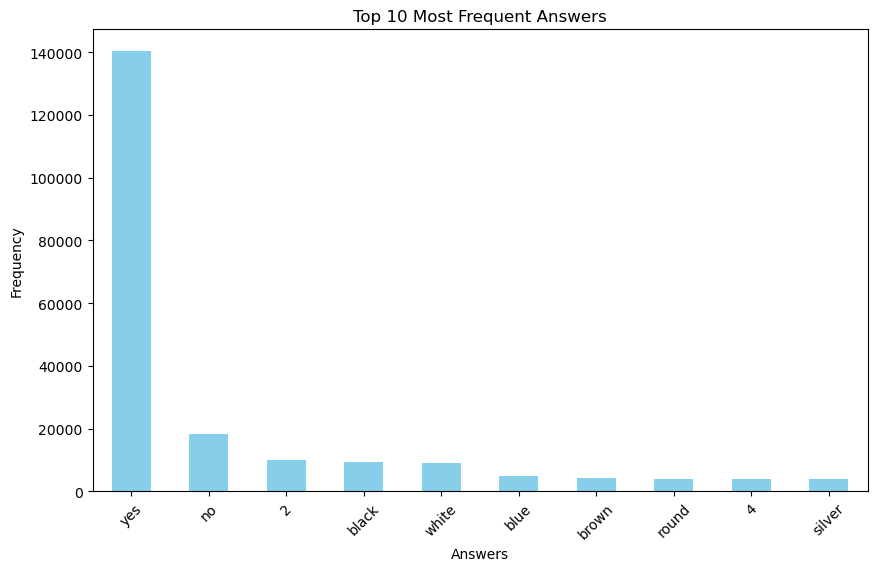

In [6]:
import matplotlib.pyplot as plt

# Flatten all answer columns into a single series
all_answers = pd.concat([df[col] for col in answers])

# Count the frequency of each answer
answer_counts = all_answers.value_counts()

# Plot the top 10 answers
top_answers = answer_counts.head(10)
top_answers.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Top 10 Most Frequent Answers')
plt.xlabel('Answers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Extract category from the image_path
df['category'] = df['image_path'].str.extract(r'categorized_data/([^/]+)/')

# Group by the extracted category
category_group = df.groupby('category')

# Display the first few rows of each group
for category, group in category_group:
    print(f"Category: {category}")
    print(group.head())

Category: ACCESSORY
                                   image_path                     question_1  \
5779  categorized_data/ACCESSORY/f7c62042.jpg            What item is shown?   
5780  categorized_data/ACCESSORY/951ada35.jpg   Is there red on the bandana?   
5781  categorized_data/ACCESSORY/ca783962.jpg  What pattern is on the scarf?   
5782  categorized_data/ACCESSORY/794fb530.jpg  What pattern is on the scarf?   
5783  categorized_data/ACCESSORY/ef830066.jpg  What material are the gloves?   

                        question_2                          question_3  \
5779         Is the scarf fringed?  What color is the lightest stripe?   
5780  What is the bandana's color?           Is the bandana stretched?   
5781      What color is the scarf?              Is this item for sale?   
5782    What is the scarf made of?                  Are there tassels?   
5783         Are there two gloves?          What color are the gloves?   

                            question_4                

/var/folders/fw/2qwjf8x5599d519l5f7fbf3r0000gn/T/ipykernel_99011/410408995.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


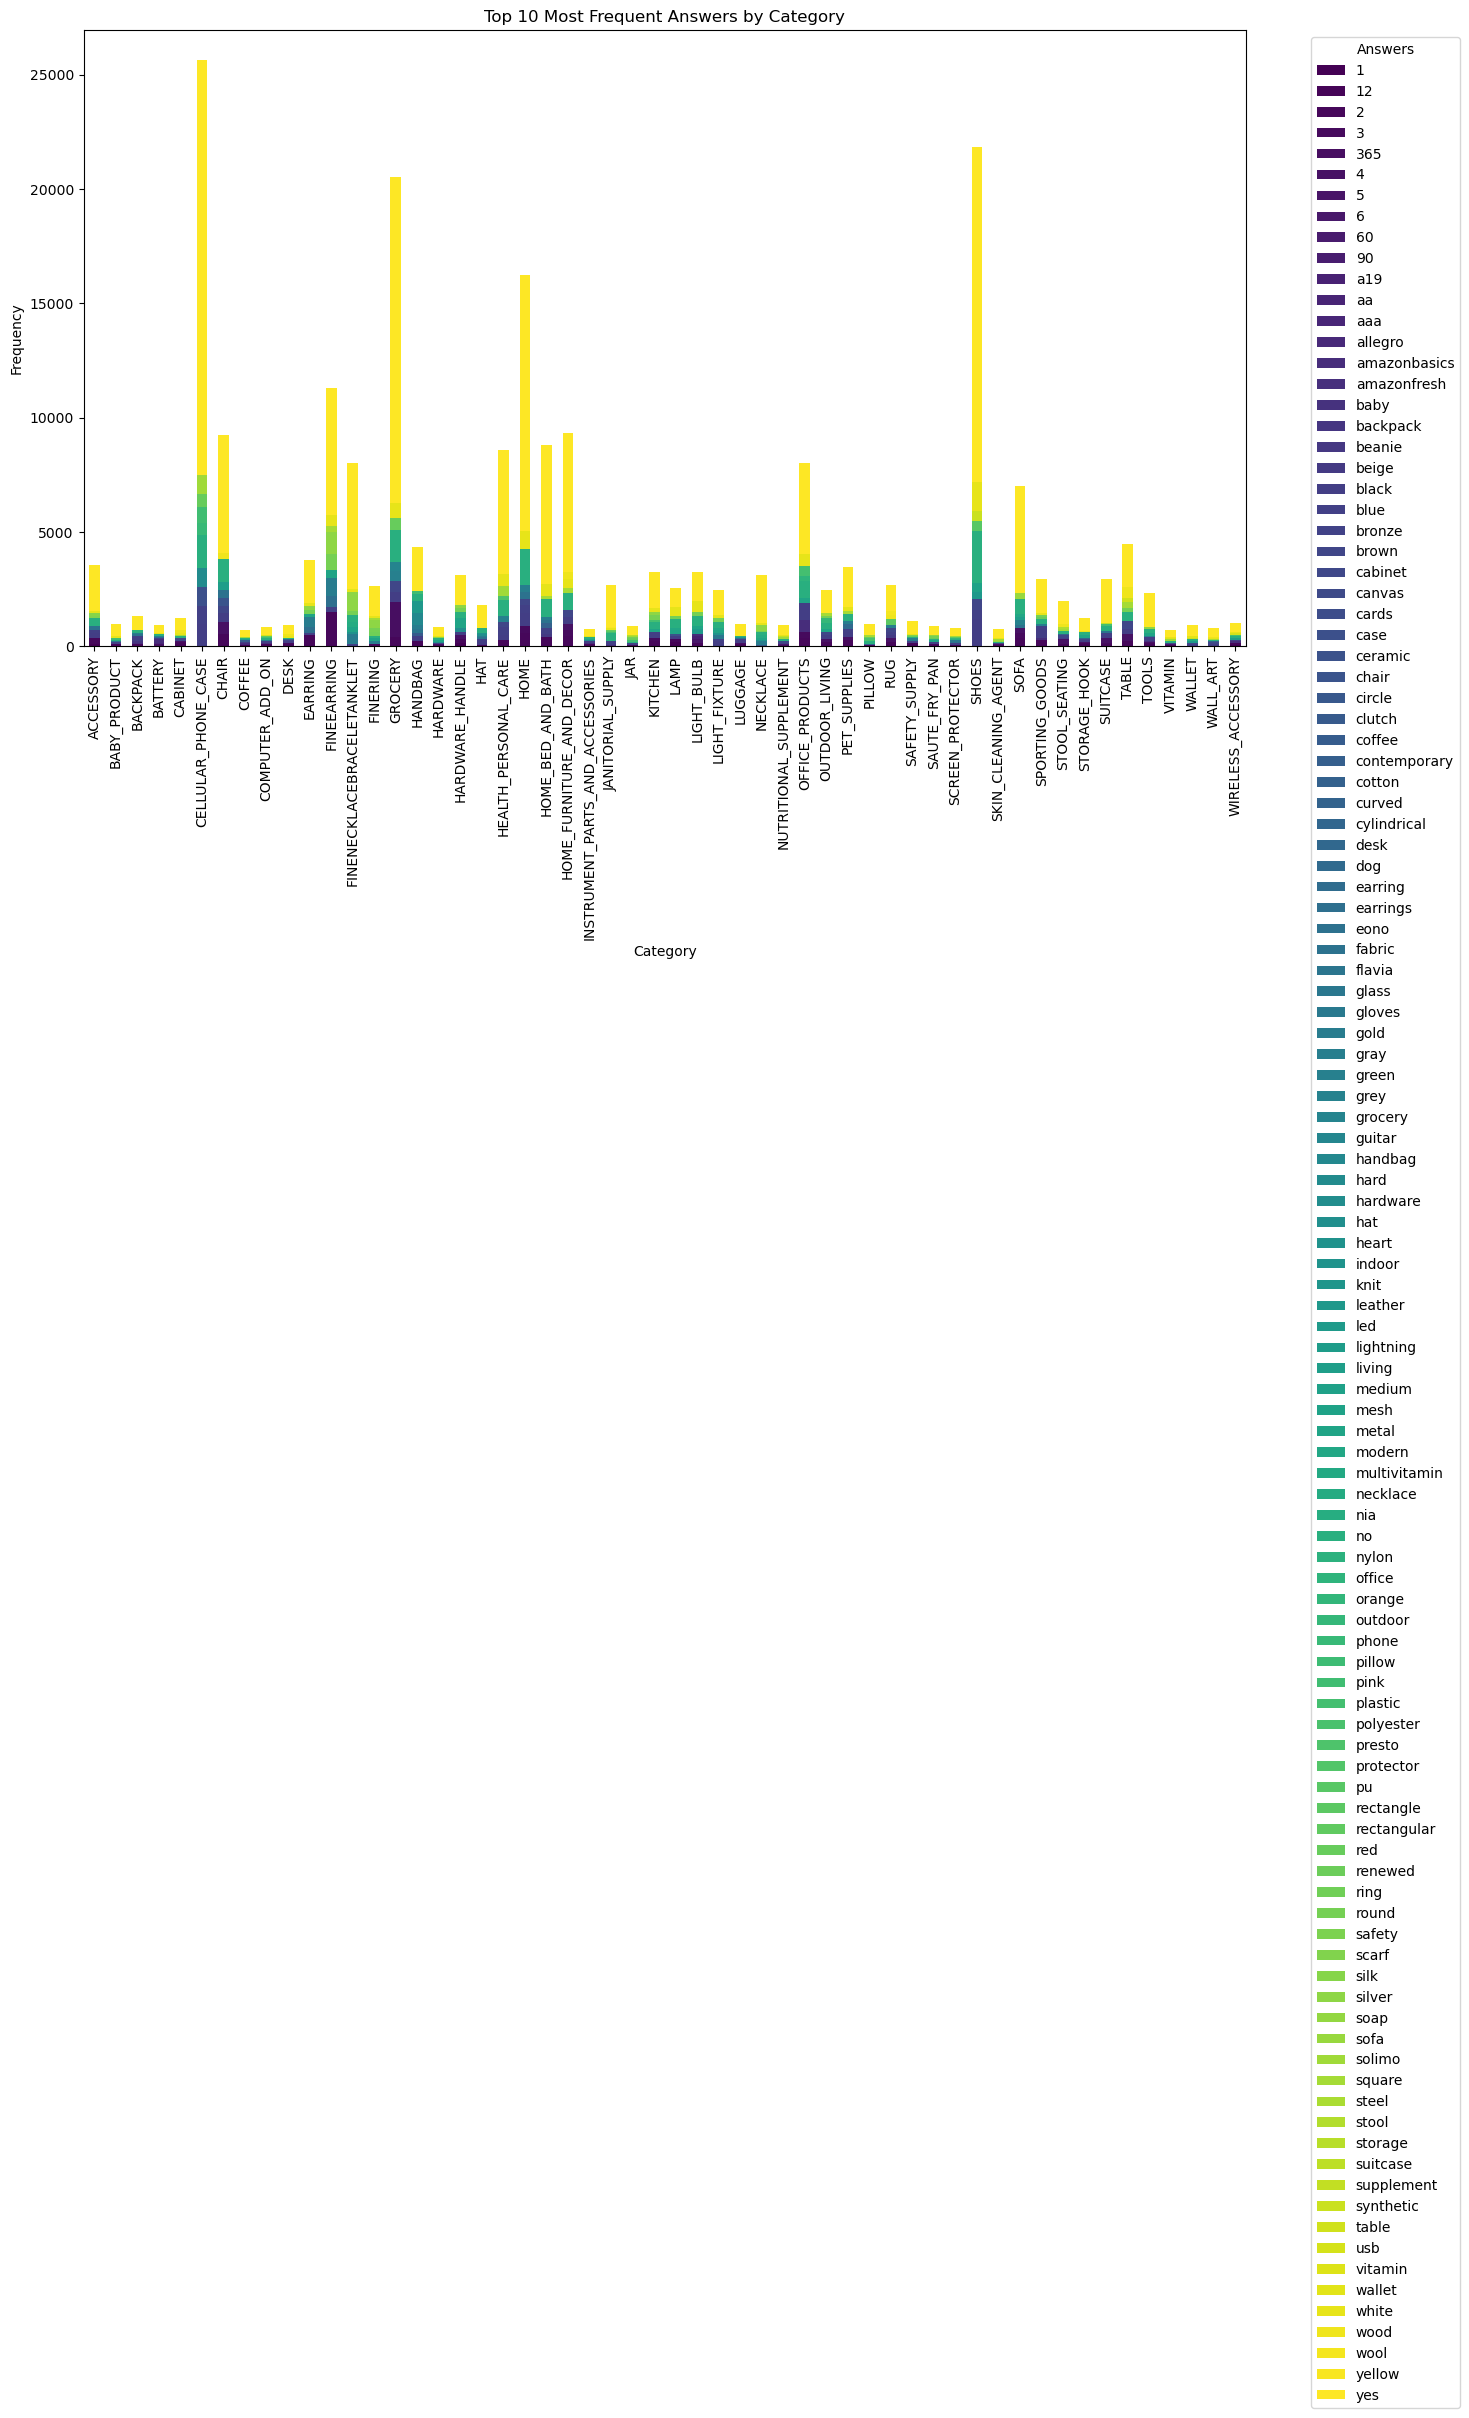

In [9]:
# Group by category and calculate top 10 most frequent answers for each category
category_top_answers = (
    df.groupby('category')[answers]
    .apply(lambda group: pd.concat([group[col] for col in group.columns]).value_counts().head(10))
)

# Display the result
# Plot the top 10 most frequent answers for each category
category_top_answers.unstack().plot(kind='bar', figsize=(15, 8), stacked=True, colormap='viridis')

plt.title('Top 10 Most Frequent Answers by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.legend(title='Answers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
import random
from IPython.display import display, Image

def display_images_with_qa(df, num_images=2):
    """
    Displays 2-3 images from each category along with their questions and answers.

    Parameters:
    df (pd.DataFrame): The dataframe containing image paths, questions, and answers.
    num_images (int): Number of images to display per category.
    """
    categories = df['category'].unique()
    
    for category in categories:
        print(f"Category: {category}")
        category_data = df[df['category'] == category]
        sampled_data = category_data.sample(n=min(num_images, len(category_data)), random_state=42)
        
        for _, row in sampled_data.iterrows():
            # Display the image using IPython's display module
            display(Image(filename=row['image_path']))
            
            # Display the questions and answers
            print("Questions and Answers:")
            for i in range(1, 11):
                question_col = f'question_{i}'
                answer_col = f'answer_{i}'
                if pd.notna(row[question_col]) and pd.notna(row[answer_col]):
                    print(f"Q: {row[question_col]}")
                    print(f"A: {row[answer_col]}")
            print("\n" + "-"*50 + "\n")

Category: GROCERY


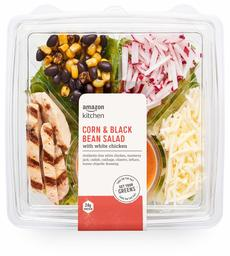

Questions and Answers:
Q: What kind of beans are present?
A: black
Q: Are there radishes visible?
A: yes
Q: What kind of chicken is used?
A: white
Q: Is there cheese in the salad?
A: yes
Q: What kind of dressing is included?
A: honey-chipotle
Q: How many chicken pieces are there?
A: 2
Q: Is lettuce in the container?
A: yes
Q: Is there corn present?
A: yes
Q: What brand is this salad?
A: amazon
Q: Is there a label present?
A: yes

--------------------------------------------------



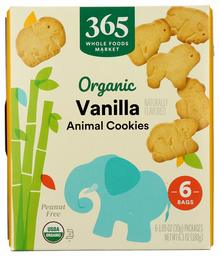

Questions and Answers:
Q: What kind of cookies are these?
A: animal
Q: What flavor are the cookies?
A: vanilla
Q: Is this product organic?
A: yes
Q: What color is the elephant?
A: blue
Q: How many bags are included?
A: 6
Q: What is the brand name?
A: 365
Q: What food are the cookies?
A: cookies
Q: What is the product's weight?
A: 6.3
Q: Are these peanut free?
A: yes
Q: What is the cookie's shape?
A: elephant

--------------------------------------------------

Category: HEALTH_PERSONAL_CARE


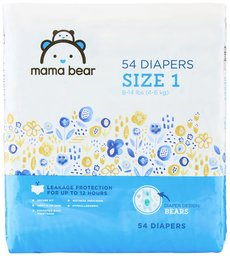

Questions and Answers:
Q: How many diapers are inside?
A: 54
Q: What brand is this?
A: mamabear
Q: What size are these diapers?
A: 1
Q: Are there bears pictured?
A: yes
Q: What protects for up to 12 hours?
A: leakage
Q: What color is the background?
A: white
Q: What is the weight in kg?
A: 6
Q: What is the diaper design?
A: bears
Q: Is the diaper hypoallergenic?
A: yes
Q: What is the diaper count?
A: 54

--------------------------------------------------



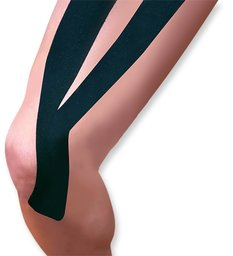

Questions and Answers:
Q: Is there tape on the leg?
A: yes
Q: What part of the body is shown?
A: leg
Q: What color is the tape?
A: black
Q: How many strips of tape are there?
A: 3
Q: Is the leg bent?
A: yes
Q: What is on the leg?
A: tape
Q: Is the background white?
A: yes
Q: What direction is the knee facing?
A: left

--------------------------------------------------

Category: PET_SUPPLIES


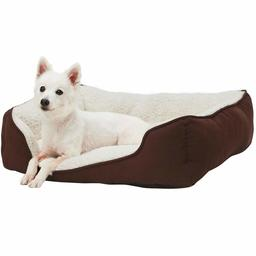

Questions and Answers:
Q: What color is the dog?
A: white
Q: Is the dog lying down?
A: yes
Q: What is the bed's main color?
A: brown
Q: What is the bed lining made of?
A: fur
Q: How many colors does the bed have?
A: 2
Q: Is the dog small?
A: yes
Q: Where is the dog lying?
A: bed
Q: Is the background visible?
A: no
Q: What is the bed's shape?
A: rectangle

--------------------------------------------------



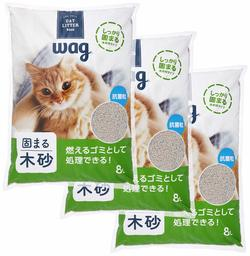

Questions and Answers:
Q: What is the litter advertised for?
A: cat
Q: How many bags of litter are there?
A: 3
Q: What is the litter made of?
A: 木砂
Q: Is there a cat on the bag?
A: yes
Q: What brand is on the package?
A: wag
Q: What does the cat litter claim to remove?
A: 臭気
Q: What number is on the bag?
A: 8
Q: What material is the litter?
A: wooden
Q: Is this cat litter?
A: yes
Q: What units are on the bag?
A: L

--------------------------------------------------

Category: ACCESSORY


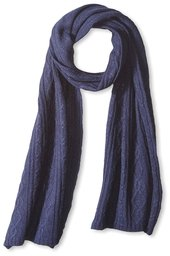

Questions and Answers:
Q: What color is the scarf?
A: blue
Q: Is the scarf knitted?
A: yes
Q: How many ends does the scarf have?
A: 2
Q: What is the scarf material?
A: cashmere
Q: Is the item displayed on a person?
A: no
Q: What clothing item is it?
A: scarf
Q: What pattern is on the scarf?
A: cable
Q: Is the scarf long?
A: yes

--------------------------------------------------



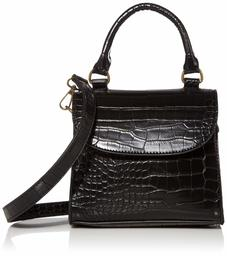

Questions and Answers:
Q: What color is the bag?
A: black
Q: Does the bag have a strap?
A: yes
Q: What is the bag's pattern?
A: crocodile
Q: What shape is the bag?
A: square
Q: Is there a handle?
A: yes
Q: What is the hardware color?
A: gold
Q: What material is the bag?
A: leather
Q: Is the bag shiny?
A: yes

--------------------------------------------------

Category: RUG


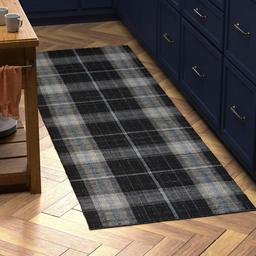

Questions and Answers:
Q: What pattern is on the rug?
A: plaid
Q: Is there a rug?
A: yes
Q: What material is the floor?
A: wood
Q: What color is the cabinetry?
A: blue
Q: How many mugs are visible?
A: 2
Q: What shape are the mugs?
A: round
Q: What is located on the counter?
A: mugs
Q: What color is the runner?
A: gray
Q: Is the floor made of tile?
A: no

--------------------------------------------------



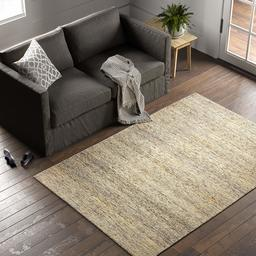

Questions and Answers:
Q: What color is the rug?
A: grey
Q: Is there a pillow on the sofa?
A: yes
Q: What material is the rug made of?
A: wool
Q: What shape is the rug?
A: rectangle
Q: Is there a plant in the picture?
A: yes
Q: Where is the rug located?
A: floor
Q: What color is the couch?
A: grey
Q: How many chairs are there?
A: 0
Q: Is there a blanket?
A: yes
Q: What is the furniture made of?
A: fabric

--------------------------------------------------

Category: LAMP


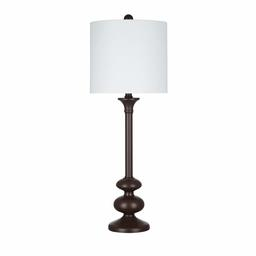

Questions and Answers:
Q: What color is the lampshade?
A: white
Q: Is there a lightbulb present?
A: yes
Q: What is the lamp's height?
A: 28
Q: What is the base color?
A: bronze
Q: What is the product type?
A: lamp
Q: Is the background plain?
A: yes
Q: What shape is the lampshade?
A: cylinder
Q: How many bulbs are included?
A: 1

--------------------------------------------------



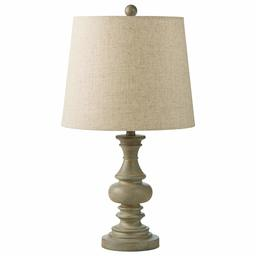

Questions and Answers:
Q: What shape is the lampshade?
A: cone
Q: What is the lamp sitting on?
A: table
Q: What color is the lampshade?
A: beige
Q: Is the lamp turned on?
A: no
Q: What is the lamp's material?
A: wood
Q: Is there a bulb visible?
A: no
Q: How many objects are visible?
A: 1
Q: Is this an indoor scene?
A: yes
Q: What is the lamp's style?
A: vintage

--------------------------------------------------

Category: LIGHT_BULB


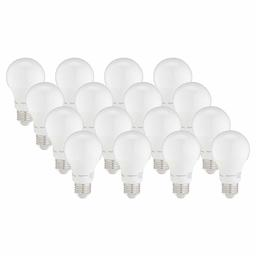

Questions and Answers:
Q: How many lightbulbs are there?
A: 15
Q: Are these lightbulbs?
A: yes
Q: What is the color of these lightbulbs?
A: white
Q: What shape are the lightbulbs?
A: bulb
Q: What are the lightbulbs mounted on?
A: base
Q: Are the lightbulbs new?
A: yes
Q: What is the appearance of the lightbulbs?
A: frosted
Q: Are the lightbulbs lit?
A: no

--------------------------------------------------



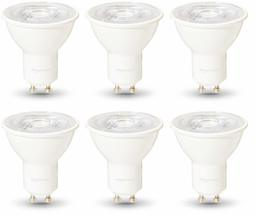

Questions and Answers:
Q: How many lightbulbs are there?
A: 6
Q: Are the bulbs dimmable?
A: yes
Q: What is the bulb style?
A: 35
Q: Is the background white?
A: yes
Q: What type of bulb is shown?
A: led
Q: What color is the light?
A: cool

--------------------------------------------------

Category: OUTDOOR_LIVING


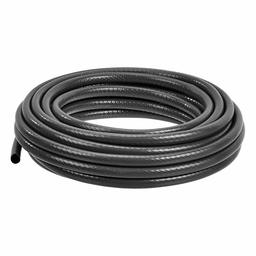

Questions and Answers:
Q: What is the hose's color?
A: black
Q: Is this hose rolled?
A: yes
Q: What is the quantity of hose shown?
A: 1
Q: What type of item is this?
A: hose
Q: Is the hose new?
A: yes
Q: What shape is created by the hose?
A: circle
Q: What is the material?
A: rubber
Q: What is the scene?
A: product

--------------------------------------------------



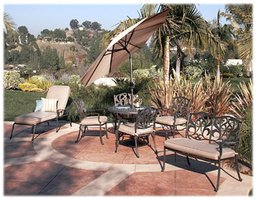

Questions and Answers:
Q: What material is the furniture?
A: aluminum
Q: How many chairs are visible?
A: 4
Q: Is there an umbrella?
A: yes
Q: What is the scene?
A: outdoor
Q: What color are the cushions?
A: beige
Q: What shape is the patio?
A: circular
Q: How many pillows are there?
A: 2
Q: What is next to the lounge?
A: bush
Q: What is in the background?
A: trees
Q: What is above the furniture?
A: umbrella

--------------------------------------------------

Category: nan
Category: CELLULAR_PHONE_CASE


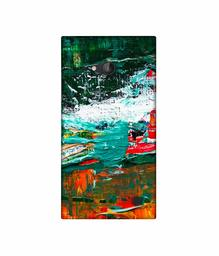

Questions and Answers:
Q: Is case painted?
A: yes
Q: What is on the case?
A: art
Q: Is this a phonecase?
A: yes
Q: What shape is phonecase?
A: rectangle
Q: What color is orange?
A: orange
Q: What color is green?
A: green
Q: Is the background white?
A: yes
Q: What is being covered?
A: phone
Q: Is this three-dimensional?
A: no

--------------------------------------------------



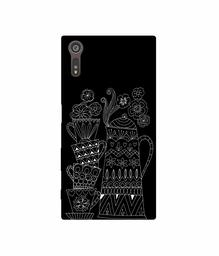

Questions and Answers:
Q: What is the background color?
A: black
Q: Are there any cups pictured?
A: yes
Q: What color is the design?
A: white
Q: Is there a tea pot pictured?
A: yes
Q: How many cups at the bottom?
A: 1
Q: What pattern is on the teapot?
A: chevron
Q: Are there flowers in the design?
A: yes
Q: What type of case is it?
A: back

--------------------------------------------------

Category: FINEEARRING


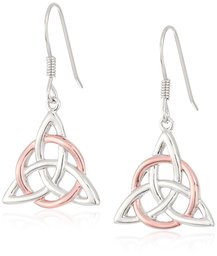

Questions and Answers:
Q: Are these earrings?
A: yes
Q: What is the jewelry's color?
A: silver
Q: What shape is the jewelry?
A: triangle
Q: Is there any pink?
A: yes
Q: How many earrings are shown?
A: 2
Q: Is the background white?
A: yes
Q: What is the material?
A: metal
Q: Are these hanging earrings?
A: yes

--------------------------------------------------



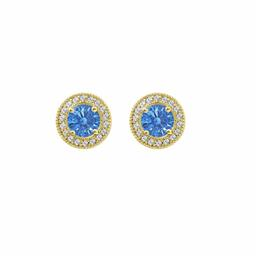

Questions and Answers:
Q: What color is the earring's center stone?
A: blue
Q: Are there any earrings?
A: yes
Q: What is the earring setting color?
A: gold
Q: What shape are the earrings?
A: round
Q: What are the outer stones?
A: diamonds
Q: How many earrings are there?
A: 2
Q: Are these stud earrings?
A: yes
Q: What is the background color?
A: white

--------------------------------------------------

Category: TABLE


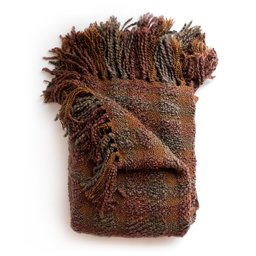

Questions and Answers:
Q: Is there a tassel?
A: yes
Q: What material covers most of the item?
A: fabric
Q: What is on the blanket's edges?
A: fringe
Q: What is the blanket's pattern?
A: plaid
Q: What is the main color of the fabric?
A: brown
Q: Is the item folded?
A: yes
Q: Is the blanket indoors?
A: yes
Q: What shape is the item?
A: square

--------------------------------------------------



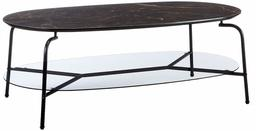

Questions and Answers:
Q: What shape is the top surface?
A: oval
Q: Is there a shelf present?
A: yes
Q: What material is the lower surface?
A: glass
Q: What color are the table legs?
A: black
Q: How many legs are visible?
A: 4
Q: Is the tabletop patterned?
A: yes
Q: What room is this in?
A: indoors
Q: What kind of table is it?
A: coffee

--------------------------------------------------

Category: HARDWARE_HANDLE


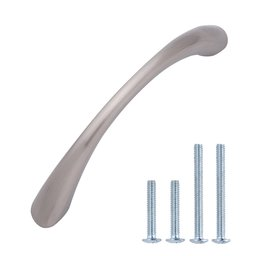

Questions and Answers:
Q: What color is the handle?
A: silver
Q: Are screws present?
A: yes
Q: How many long screws are there?
A: 2
Q: How many short screws are there?
A: 2
Q: What is the object used for?
A: hardware
Q: Is handle curved?
A: yes
Q: What is the handle's finish?
A: satin
Q: What shape is the handle?
A: arch
Q: How many handles are shown?
A: 1

--------------------------------------------------



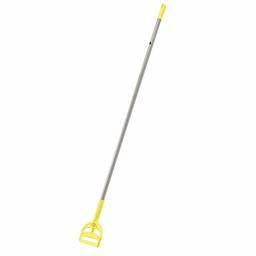

Questions and Answers:
Q: What color is the handle?
A: yellow
Q: What is this object?
A: mop
Q: Is the mop tall?
A: yes
Q: What material is the pole?
A: metal
Q: Is the floor visible?
A: no
Q: What is at the top?
A: loop
Q: Is it a cleaning tool?
A: yes
Q: What color is the connector?
A: yellow

--------------------------------------------------

Category: LIGHT_FIXTURE


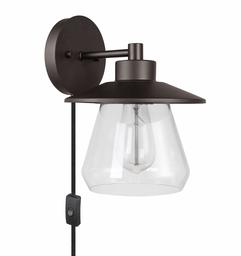

Questions and Answers:
Q: What color is the sconce?
A: bronze
Q: Is there a switch on the cord?
A: yes
Q: What is the bulb surrounded by?
A: glass
Q: What is the shade shape?
A: conical
Q: What is the sconce mounted on?
A: wall
Q: What type of bulb is shown?
A: edison
Q: What finish is the sconce?
A: dark
Q: What direction does the arm extend?
A: right
Q: Is the sconce plugged?
A: yes
Q: What is the background color?
A: white

--------------------------------------------------



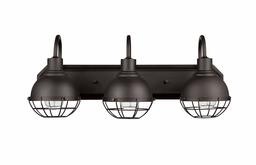

Questions and Answers:
Q: How many lights are visible?
A: 3
Q: What color is the fixture?
A: bronze
Q: Are cages present?
A: yes
Q: What is the style?
A: modern
Q: What shape are the shades?
A: round
Q: Where are the lights mounted?
A: wall
Q: What is the item type?
A: light
Q: Is there a reflection?
A: no

--------------------------------------------------

Category: NUTRITIONAL_SUPPLEMENT


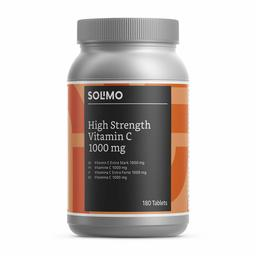

Questions and Answers:
Q: What is the vitamin strength?
A: 1000
Q: What is the product brand?
A: solimo
Q: How many tablets are there?
A: 180
Q: Is the jar silver?
A: yes
Q: What is the vitamin?
A: c
Q: What is the product form?
A: tablets
Q: What color is the background?
A: white
Q: Is this a food item?
A: no

--------------------------------------------------



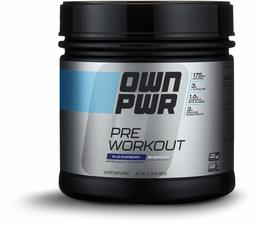

Questions and Answers:
Q: What flavor is written on the product?
A: raspberry
Q: Is the container round?
A: yes
Q: How many grams of creatine?
A: 3
Q: What type of powder is this?
A: preworkout
Q: How many servings?
A: 30
Q: What is the first word on the product?
A: own
Q: Is the lid black?
A: yes
Q: What color is the text "PRE"?
A: blue
Q: What is the caffeine amount?
A: 175
Q: What is the color of the writing?
A: white

--------------------------------------------------

Category: SAFETY_SUPPLY


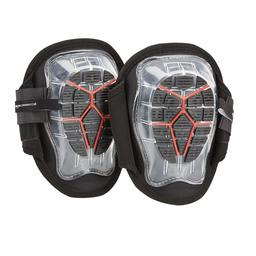

Questions and Answers:
Q: What color are the straps?
A: black
Q: Are there two pads?
A: yes
Q: What color is the center pattern?
A: red
Q: What shape are the pads?
A: oval
Q: What is the material of pads?
A: plastic
Q: How many fasteners are visible?
A: 2
Q: What is the background color?
A: white
Q: Is the background uniform?
A: yes
Q: What is being shown?
A: pads

--------------------------------------------------



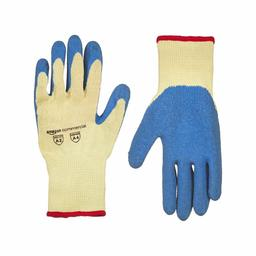

Questions and Answers:
Q: What is the primary color?
A: blue
Q: What is the glove's material?
A: knit
Q: Are gloves presented?
A: yes
Q: What is the cuff trim's color?
A: red
Q: What color is the palm?
A: cream
Q: How many gloves are there?
A: 2
Q: What pattern covers the hand?
A: dots
Q: What is the item's type?
A: glove
Q: What is the glove's purpose?
A: commercial

--------------------------------------------------

Category: BACKPACK


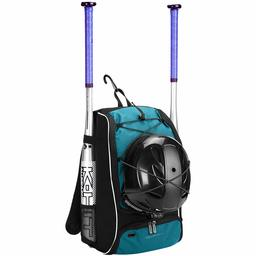

Questions and Answers:
Q: What color is the backpack?
A: blue
Q: Is there a helmet?
A: yes
Q: How many bats are there?
A: 2
Q: What is on the side?
A: kat
Q: What color is the bat's grip?
A: purple
Q: What color is the helmet?
A: black
Q: Is the backpack new?
A: no
Q: What is the backpack's material?
A: polyester

--------------------------------------------------



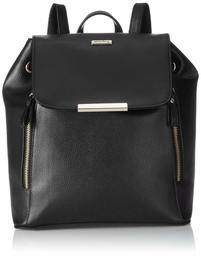

Questions and Answers:
Q: What color is the backpack?
A: black
Q: Are there zippers visible?
A: yes
Q: What type of bag is this?
A: backpack
Q: What is the bag's material?
A: leather
Q: Is there a handle?
A: yes
Q: What is the bag's style?
A: shoulder
Q: What is the bag's pattern?
A: textured
Q: How many straps are there?
A: 2
Q: Is the bag closed?
A: yes

--------------------------------------------------

Category: WIRELESS_ACCESSORY


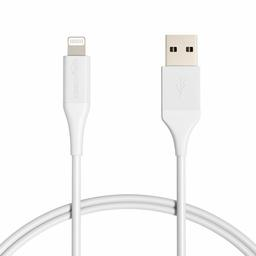

Questions and Answers:
Q: What color is the cable?
A: white
Q: How many connectors are visible?
A: 2
Q: Is the background white?
A: yes
Q: What type of connector is shown?
A: usb
Q: What is the connector on the left?
A: lightning
Q: Is the item an accessory?
A: yes
Q: What collection is mentioned?
A: advanced
Q: What is the product type?
A: cable
Q: Is it an iphone charger?
A: yes
Q: What is the style?
A: 1

--------------------------------------------------



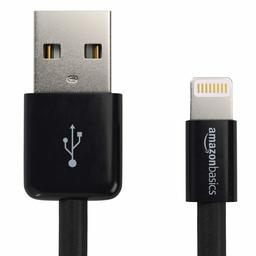

Questions and Answers:
Q: What color is the cable?
A: black
Q: What is the cable's brand?
A: amazonbasics
Q: Is there a logo on the cable?
A: yes
Q: What type of connector is pictured?
A: usb
Q: What shape is the usb symbol?
A: tree
Q: Is this a lightning cable?
A: yes
Q: What color is the background?
A: white
Q: What is the cable's length?
A: 10
Q: How many connectors are shown?
A: 2
Q: Are the connectors connected?
A: no

--------------------------------------------------

Category: BATTERY


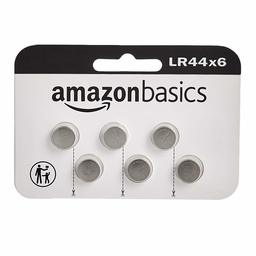

Questions and Answers:
Q: How many batteries are pictured?
A: 6
Q: Is there a warning symbol?
A: yes
Q: What brand is this?
A: amazonbasics
Q: What is the model number?
A: lr44x6
Q: What is the battery color?
A: silver
Q: Is the package white?
A: yes
Q: Is this a household item?
A: yes
Q: Are the batteries new?
A: yes

--------------------------------------------------



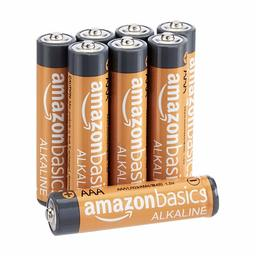

Questions and Answers:
Q: What is the battery brand?
A: amazonbasics
Q: What type of battery is this?
A: alkaline
Q: How many batteries are standing?
A: 7
Q: Are the batteries new?
A: yes
Q: What color is the background?
A: white
Q: What size are the batteries?
A: aaa
Q: What shape are the batteries?
A: cylindrical
Q: How many batteries are visible?
A: 8
Q: What is the battery casing color?
A: gray

--------------------------------------------------

Category: WALL_ART


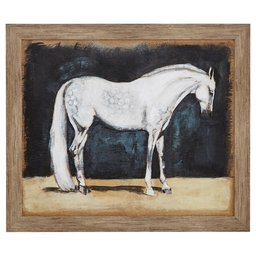

Questions and Answers:
Q: What color is the horse?
A: white
Q: Is there a frame?
A: yes
Q: What is the horse's pose?
A: standing
Q: What style is the piece?
A: horse
Q: What covers background?
A: paint
Q: What is the art type?
A: print
Q: Is the print horizontal?
A: yes
Q: What color is the frame?
A: brown

--------------------------------------------------



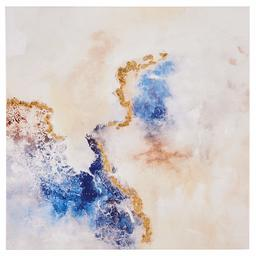

Questions and Answers:
Q: What color is the abstract art?
A: beige
Q: Is gold leaf used?
A: yes
Q: What is the art medium?
A: canvas
Q: What is the art style?
A: contemporary
Q: Are there blue tones present?
A: yes
Q: What shape is the artwork?
A: square
Q: Is the art abstract?
A: yes
Q: What color is the leaf?
A: gold
Q: What background color exists?
A: white
Q: Is painting apparent?
A: yes

--------------------------------------------------

Category: WALLET


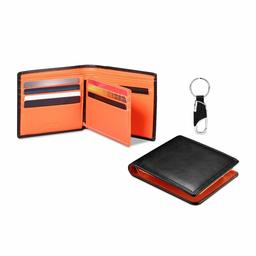

Questions and Answers:
Q: What color is the inside of wallet?
A: orange
Q: What is next to the open wallet?
A: keychain
Q: Is there a closed wallet present?
A: yes
Q: What color is the keychain?
A: black
Q: How many wallets are there?
A: 2
Q: What is the wallet made of?
A: leather
Q: What is next to the keychain?
A: wallet
Q: What shape is the keychain?
A: circle
Q: What color is the closed wallet?
A: black
Q: Is the wallet open?
A: yes

--------------------------------------------------



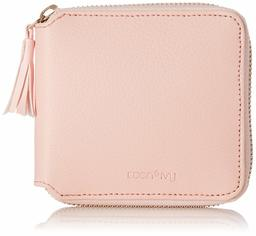

Questions and Answers:
Q: What color is the wallet?
A: peach
Q: Is there a tassel?
A: yes
Q: What material is the wallet?
A: synthetic
Q: What is on the zipper?
A: tassel
Q: What is the wallet's style?
A: wallet
Q: What is the brand?
A: amazon
Q: Is the wallet closed?
A: yes
Q: Is the wallet square?
A: yes

--------------------------------------------------

Category: JAR


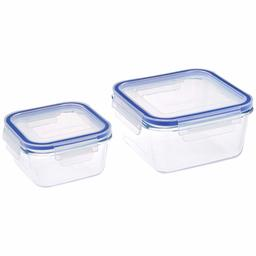

Questions and Answers:
Q: What is the container material?
A: glass
Q: How many containers are there?
A: 2
Q: Are the containers square?
A: yes
Q: What is the color of the rim?
A: blue
Q: What is the color of container?
A: transparent
Q: What shape are the containers?
A: square
Q: Are the containers empty?
A: yes
Q: What is being stored?
A: nothing
Q: What is the brand?
A: solimo

--------------------------------------------------



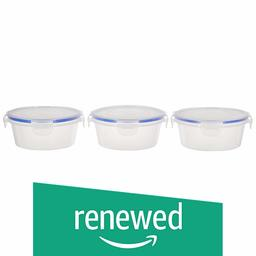

Questions and Answers:
Q: What color are the container lids?
A: blue
Q: What is the count of containers?
A: 3
Q: Is text visible in the image?
A: yes
Q: What is the state of the product?
A: renewed
Q: Are the containers airtight?
A: yes
Q: What shape are the containers?
A: round
Q: What is the material of containers?
A: plastic
Q: What is the brand?
A: solimo

--------------------------------------------------

Category: INSTRUMENT_PARTS_AND_ACCESSORIES


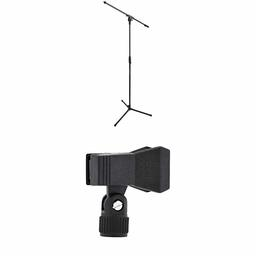

Questions and Answers:
Q: What color is the microphone stand?
A: black
Q: Is there a microphone present?
A: no
Q: What shape is the stand's base?
A: tripod
Q: What type of microphone clip is included?
A: clothespin
Q: Is the stand fully assembled?
A: yes
Q: What is the stand's primary material?
A: metal
Q: Is the background plain?
A: yes
Q: What is the clip's color?
A: black
Q: What type of object is it?
A: stand

--------------------------------------------------



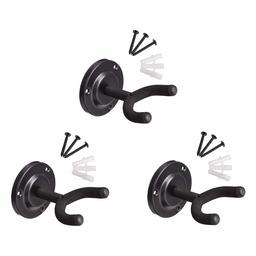

Questions and Answers:
Q: How many guitar hangers are there?
A: 3
Q: What color are the hangers?
A: black
Q: Are screws included?
A: yes
Q: What shape is the base?
A: round
Q: What is the scene?
A: product
Q: Are wall anchors included?
A: yes
Q: Is the background white?
A: yes
Q: Are there hangers?
A: yes
Q: What are the screws color?
A: black

--------------------------------------------------

Category: SAUTE_FRY_PAN


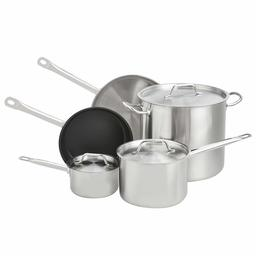

Questions and Answers:
Q: How many pans have handles?
A: 4
Q: Are the pans silver?
A: yes
Q: What material is the pan?
A: stainless
Q: Is there a lid on the pot?
A: yes
Q: What is the color of one pan?
A: black
Q: What is the shape of the pans?
A: round
Q: How many pots are shown?
A: 5
Q: Is one pot larger?
A: yes
Q: Is the background white?
A: yes

--------------------------------------------------



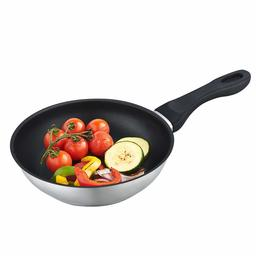

Questions and Answers:
Q: What color are the tomatoes?
A: red
Q: Is there zucchini in the pan?
A: yes
Q: What material is the pan?
A: metal
Q: What is inside the pan?
A: food
Q: Is there a handle on the pan?
A: yes
Q: What color is the handle?
A: black
Q: How many tomatoes are there?
A: 5
Q: What shape is the pan?
A: round
Q: Is there onion in the pan?
A: yes
Q: Is there a lid?
A: no

--------------------------------------------------

Category: SCREEN_PROTECTOR


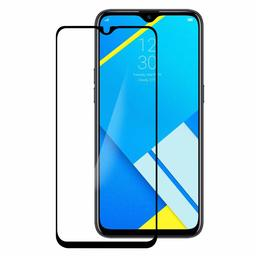

Questions and Answers:
Q: What color is the screen?
A: blue
Q: Is there a time displayed?
A: yes
Q: What is the protector's color?
A: black
Q: How many devices are there?
A: 1
Q: Are there numbers displayed?
A: yes
Q: Is a screen protector present?
A: yes
Q: What is the phone's model?
A: c2
Q: What is the screen's shape?
A: rectangle
Q: What is the screen type?
A: glass

--------------------------------------------------



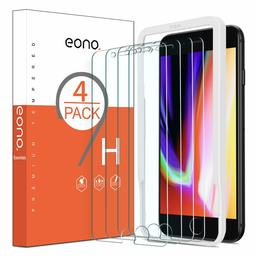

Questions and Answers:
Q: How many screen protectors are included?
A: 4
Q: Is the phone black?
A: yes
Q: What is the hardness rating?
A: 9
Q: What is the brand name?
A: eono
Q: What is the box color?
A: orange
Q: What is being protected?
A: screen
Q: What is the backing color?
A: white
Q: Are the protectors tempered?
A: yes

--------------------------------------------------

Category: HOME


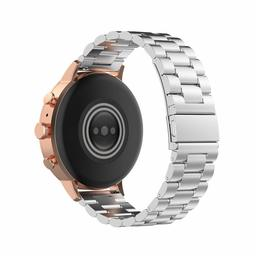

Questions and Answers:
Q: What color is the watchband?
A: silver
Q: Is the watch round?
A: yes
Q: What is the watch band material?
A: metal
Q: Is the background white?
A: yes
Q: What color is the watch face?
A: black
Q: Are there buttons on the watch?
A: yes
Q: What color is the watch body?
A: rose
Q: Is this an advertisement?
A: no
Q: What is the band's width?
A: 18
Q: Is the watch digital?
A: no

--------------------------------------------------



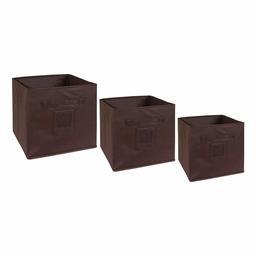

Questions and Answers:
Q: What color are the boxes?
A: brown
Q: Are there more than two boxes?
A: yes
Q: How many boxes are pictured?
A: 3
Q: Do the boxes have handles?
A: no
Q: What shape are the boxes?
A: cube
Q: Is this a storage product?
A: yes
Q: Are these boxes made of fabric?
A: yes
Q: Is the largest box on the left?
A: yes

--------------------------------------------------

Category: NECKLACE


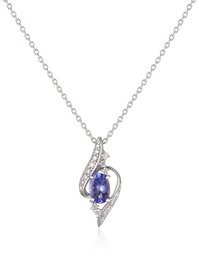

Questions and Answers:
Q: What color is the stone?
A: blue
Q: Is there a chain?
A: yes
Q: What type of jewelry is it?
A: necklace
Q: What is the metal color?
A: white
Q: What is the necklace's setting?
A: indoors
Q: Are diamonds present?
A: yes
Q: What shape is the gemstone?
A: oval
Q: What is the pendant's appearance?
A: elegant
Q: Is the background visible?
A: no

--------------------------------------------------



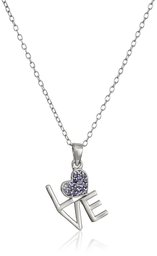

Questions and Answers:
Q: What is the necklace made of?
A: metal
Q: Is there a heart shape?
A: yes
Q: What does the pendant spell?
A: love
Q: What is the stone color?
A: blue
Q: How many letters are there?
A: 4
Q: Is the chain silver?
A: yes
Q: What is the setting?
A: studio
Q: Is the chain attached?
A: yes
Q: Is it jewelry?
A: yes
Q: What style is it?
A: hearts

--------------------------------------------------

Category: CHAIR


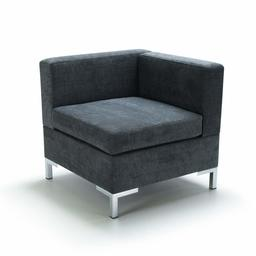

Questions and Answers:
Q: What is the object's material?
A: fabric
Q: Is there an armrest?
A: yes
Q: What color is the furniture?
A: gray
Q: What is the object's shape?
A: square
Q: What type of legs does it have?
A: metal
Q: How many legs are visible?
A: 4
Q: What is the scene?
A: indoors
Q: Is there a cushion?
A: yes
Q: What shape is the cushion?
A: square
Q: What is it?
A: chair

--------------------------------------------------



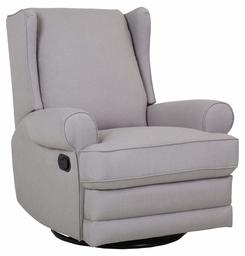

Questions and Answers:
Q: What color is the chair?
A: grey
Q: Is this a recliner?
A: yes
Q: What type of furniture is this?
A: chair
Q: Is there a handle on the side?
A: yes
Q: Is this chair new?
A: yes
Q: What is its base?
A: swivel
Q: What material is the chair?
A: fabric
Q: Does the chair have armrests?
A: yes
Q: Is the background visible?
A: no
Q: What style is the chair?
A: modern

--------------------------------------------------

Category: OFFICE_PRODUCTS


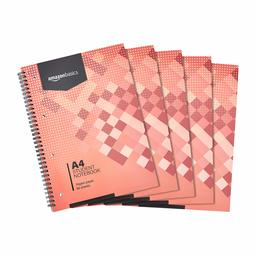

Questions and Answers:
Q: How many notebooks are there?
A: 5
Q: What color are the notebooks?
A: coral
Q: Is this a school supply?
A: yes
Q: What material are the notebooks made of?
A: paper
Q: What is printed on the notebook?
A: amazonbasics
Q: What kind of binding is present?
A: spiral
Q: What is the notebook size?
A: a4
Q: Are the notebooks stacked?
A: no

--------------------------------------------------



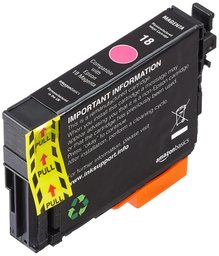

Questions and Answers:
Q: What color is the circle on top?
A: magenta
Q: What does the arrow indicate to do?
A: pull
Q: Is there a recycle symbol visible?
A: yes
Q: What color is the orange piece?
A: orange
Q: What is the brand name?
A: amazonbasics
Q: What type of cartridge is it?
A: ink
Q: What is the cartridge number?
A: 18
Q: Is the cartridge new?
A: no

--------------------------------------------------

Category: EARRING


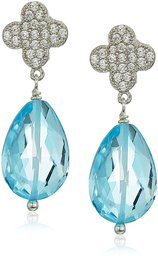

Questions and Answers:
Q: What color are the dangling gems?
A: blue
Q: What shape are the blue gems?
A: teardrop
Q: Are the earrings shiny?
A: yes
Q: What are the tops made of?
A: zirconia
Q: How many earrings are shown?
A: 2
Q: What is the earring setting color?
A: silver
Q: What is the earring's material?
A: topaz
Q: What shape are the tops?
A: clover

--------------------------------------------------



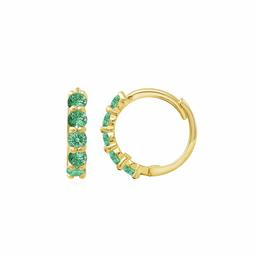

Questions and Answers:
Q: What color are the gems?
A: green
Q: What is the earring's shape?
A: circle
Q: Is the earring metallic?
A: yes
Q: What is the material color?
A: gold
Q: Are there gems present?
A: yes
Q: How many earrings exist?
A: 2
Q: What is the earring style?
A: hoop
Q: Are these earrings?
A: yes

--------------------------------------------------

Category: FINERING


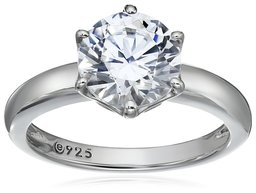

Questions and Answers:
Q: What is the ring made of?
A: silver
Q: Is the ring shiny?
A: yes
Q: What shape is the stone?
A: round
Q: How many prongs hold the stone?
A: 6
Q: What is the stone's color?
A: white
Q: Is there a marking on the ring?
A: yes
Q: Is the setting elevated?
A: yes
Q: What is the band's style?
A: plain
Q: What metal is the ring?
A: sterling
Q: Is this jewelry?
A: yes

--------------------------------------------------



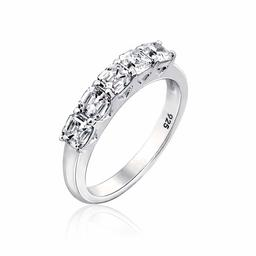

Questions and Answers:
Q: What is the ring made of?
A: silver
Q: Is there any text on the ring?
A: yes
Q: What is the number on the ring?
A: 925
Q: What are the stones shaped like?
A: asher
Q: Is the ring shiny?
A: yes
Q: Is the background white?
A: yes
Q: How many stones are there?
A: 5
Q: Is this jewelry?
A: yes

--------------------------------------------------

Category: STORAGE_HOOK


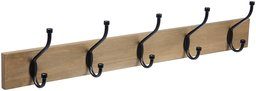

Questions and Answers:
Q: How many hooks are there?
A: 5
Q: Are the hooks black?
A: yes
Q: Is this wall-mountable?
A: yes
Q: What color is the wood?
A: brown
Q: Are the hooks metal?
A: yes
Q: What is this object?
A: rack
Q: Is the wood stained?
A: no
Q: What is the item style?
A: single

--------------------------------------------------



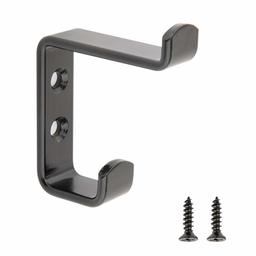

Questions and Answers:
Q: What color is the hook?
A: black
Q: Are there screws present?
A: yes
Q: How many mounting holes are there?
A: 2
Q: What shape is the hook?
A: c
Q: Is this a single hook?
A: no
Q: What type of product is it?
A: hook
Q: What is the finish?
A: matt
Q: What is the hook made of?
A: metal
Q: Are there two hooks present?
A: yes

--------------------------------------------------

Category: CABINET


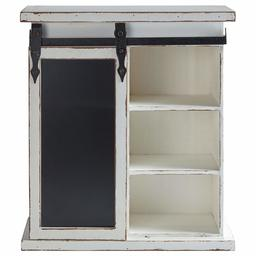

Questions and Answers:
Q: Is there a chalkboard?
A: yes
Q: How many shelves are visible?
A: 3
Q: What color is the cabinet?
A: white
Q: What is on the cabinet?
A: hardware
Q: Is the door open?
A: no
Q: What shape is the hardware?
A: arrow
Q: What is to the door's right?
A: shelves
Q: What is this?
A: cabinet
Q: What material is it made of?
A: wood

--------------------------------------------------



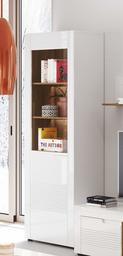

Questions and Answers:
Q: Is there a vase in the cabinet?
A: yes
Q: What color is the cabinet?
A: white
Q: Are there books in the cabinet?
A: yes
Q: How many shelves are visible?
A: 3
Q: What is on the lower cabinet?
A: device
Q: What color is the orange lamp?
A: orange
Q: What room is shown?
A: indoor
Q: Is there a door on the cabinet?
A: no
Q: What is the book on the shelf?
A: theoutside

--------------------------------------------------

Category: BABY_PRODUCT


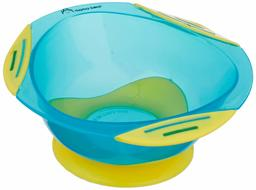

Questions and Answers:
Q: What color is the bowl?
A: blue
Q: Is the bowl see-through?
A: yes
Q: What plastic is the bowl made of?
A: polypropylene
Q: Are handles on the bowl?
A: yes
Q: What is under the bowl?
A: suction
Q: How many handles are visible?
A: 2
Q: Is the bowl for a baby?
A: yes
Q: Is the bowl bpa-free?
A: yes
Q: What is the suction base color?
A: yellow

--------------------------------------------------



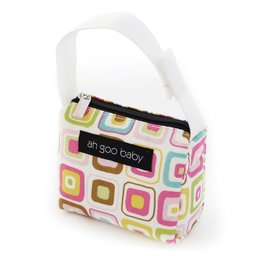

Questions and Answers:
Q: What is the brand name on the product?
A: ah_goo_baby
Q: Is the bag zippered?
A: yes
Q: What is the strap's color?
A: white
Q: Are there squares on the bag?
A: yes
Q: What pattern is on the bag?
A: squares
Q: What color is one square?
A: pink
Q: How many colors are present?
A: 4
Q: Is the zipper black?
A: yes
Q: What shape are the squares?
A: square

--------------------------------------------------

Category: LUGGAGE


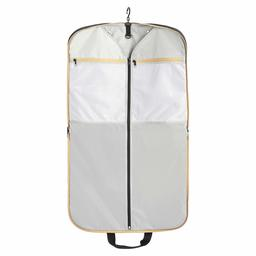

Questions and Answers:
Q: What is the color of the bag?
A: beige
Q: Is the bag open?
A: yes
Q: How many zippers are on the bag?
A: 1
Q: Is the bag hanging?
A: yes
Q: What material is the upper part?
A: plastic
Q: What color is the handle?
A: black
Q: Does the bag have pockets?
A: yes
Q: What is the bag used for?
A: clothes

--------------------------------------------------



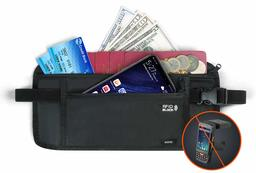

Questions and Answers:
Q: What color is the pouch?
A: black
Q: Is there a passport visible?
A: yes
Q: What is protruding from the pouch?
A: money
Q: What material is visible?
A: fabric
Q: How many cards are visible?
A: 2
Q: What electronic device is present?
A: phone
Q: Is the product blocking technology?
A: rfid
Q: What is a currency shown?
A: dollars
Q: Is there a buckle visible?
A: yes
Q: Is the phone screen on?
A: yes

--------------------------------------------------

Category: PILLOW


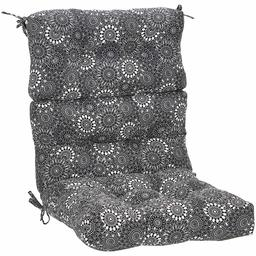

Questions and Answers:
Q: What color is the cushion?
A: black
Q: Are there ties on the cushion?
A: yes
Q: What shape is the pattern?
A: circle
Q: What is the cushion's material?
A: polyspun
Q: Is the cushion tufted?
A: yes
Q: Where is the cushion located?
A: outdoor
Q: How many sections does cushion have?
A: 3
Q: What type of furniture is this for?
A: chair

--------------------------------------------------



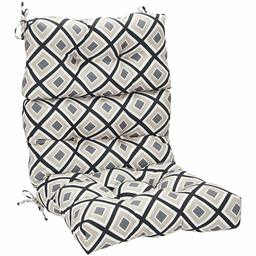

Questions and Answers:
Q: What pattern is on the cushion?
A: diamond
Q: How many ties are visible?
A: 4
Q: Is the cushion tufted?
A: yes
Q: What color is the background?
A: beige
Q: What color is the dark diamond outline?
A: black
Q: What material is the cushion?
A: polyester
Q: What shape are the decorations?
A: diamond
Q: Is this indoor?
A: no
Q: How many cushion sections are there?
A: 4

--------------------------------------------------

Category: SKIN_CLEANING_AGENT


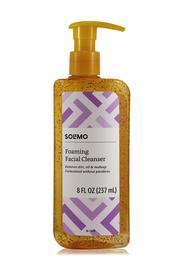

Questions and Answers:
Q: What color is the bottle?
A: orange
Q: What is the product type?
A: cleanser
Q: Is there writing on the bottle?
A: yes
Q: What brand is shown?
A: soemo
Q: What is the volume?
A: 8
Q: What is the unit of measurement?
A: oz
Q: Is there a pump?
A: yes
Q: What is the bottle's shape?
A: rectangular
Q: What pattern is on the bottle?
A: chevron
Q: What does cleanser do?
A: foaming

--------------------------------------------------



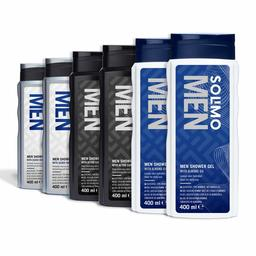

Questions and Answers:
Q: How many total bottles are shown?
A: 6
Q: What brand is on the product?
A: solmo
Q: Is the product for men?
A: yes
Q: What color is the right bottle?
A: blue
Q: What is the product?
A: gel
Q: What unit is listed?
A: ml
Q: What is the bottle volume?
A: 400
Q: Are the bottles standing?
A: yes
Q: What color is the second bottle?
A: white
Q: What is on the product?
A: men

--------------------------------------------------

Category: HARDWARE


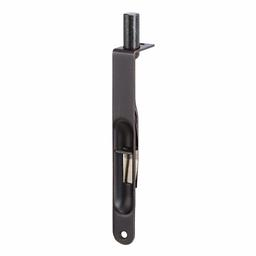

Questions and Answers:
Q: What color is the hardware?
A: black
Q: Is there a latch?
A: yes
Q: What is this item?
A: bolt
Q: What material is it?
A: metal
Q: Is the bolt horizontal?
A: no
Q: Where is the hole?
A: bottom
Q: Is the background white?
A: yes
Q: What is the bolt's position?
A: vertical

--------------------------------------------------



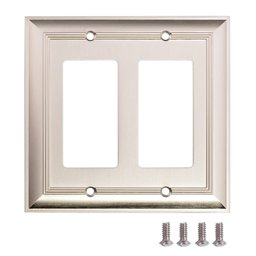

Questions and Answers:
Q: What shape are the holes?
A: rectangle
Q: How many screw holes are present?
A: 4
Q: What is the object's color?
A: silver
Q: Are screws visible?
A: yes
Q: What is the object?
A: plate
Q: How many screws are there?
A: 4
Q: Is the plate decorative?
A: yes
Q: What is the plate's material?
A: metal
Q: What shape is the plate?
A: square

--------------------------------------------------

Category: DESK


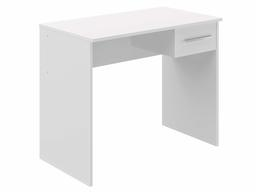

Questions and Answers:
Q: What color is the desk?
A: white
Q: Is there a drawer?
A: yes
Q: What side is the drawer on?
A: right
Q: What material is the desk?
A: wood
Q: What shape is the drawer handle?
A: rectangle
Q: How many legs does the desk have?
A: 2
Q: Is the background visible?
A: yes

--------------------------------------------------



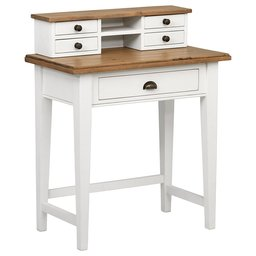

Questions and Answers:
Q: What color are the desk legs?
A: white
Q: Is there a drawer on the desk?
A: yes
Q: What shape is the drawer handle?
A: arc
Q: What is the desk surface color?
A: brown
Q: How many small drawers are visible?
A: 4
Q: What type of furniture is this?
A: desk
Q: What color are the small drawer knobs?
A: black
Q: Is there a shelf above the desk?
A: yes
Q: What material is the desk made of?
A: pine

--------------------------------------------------

Category: VITAMIN


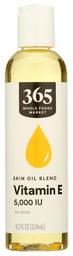

Questions and Answers:
Q: Is this oil?
A: yes
Q: What is the brand's number?
A: 365
Q: What kind of bottle is it?
A: oil
Q: What is in the bottle?
A: liquid
Q: What vitamin is on the label?
A: e
Q: How many iu are listed?
A: 5000
Q: What color is the liquid?
A: yellow
Q: Is it a skin product?
A: yes
Q: What is the measurement in oz?
A: 4.2
Q: What does the product contain?
A: vitamin

--------------------------------------------------



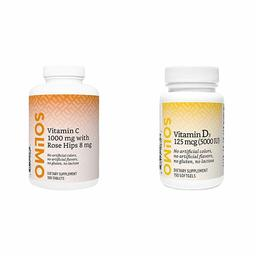

Questions and Answers:
Q: What brand are the products?
A: solimo
Q: What is in the orange bottle?
A: vitamin
Q: How many softgels in the d3?
A: 150
Q: What vitamin is in the white bottle?
A: d
Q: Are there artificial colors?
A: no
Q: How many bottles are shown?
A: 2
Q: What supplement contains rose hips?
A: c
Q: Is the bottle white?
A: yes
Q: What measurement is the vitamin d?
A: mcg
Q: What does the vitamin d contain?
A: softgels

--------------------------------------------------

Category: COFFEE


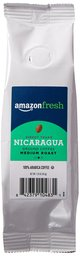

Questions and Answers:
Q: What brand is seen on package?
A: amazonfresh
Q: Is there a barcode present?
A: yes
Q: What is the coffee's origin?
A: nicaragua
Q: What color is the bean shown?
A: brown
Q: What roast is the coffee?
A: medium
Q: What is the net weight?
A: 1.75
Q: Is the coffee ground?
A: yes
Q: What material is the packaging?
A: foil

--------------------------------------------------



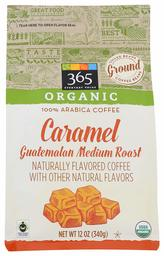

Questions and Answers:
Q: What is the flavor of the coffee?
A: caramel
Q: Is the coffee organic?
A: yes
Q: What brand is the coffee?
A: 365
Q: What type of coffee is it?
A: ground
Q: What coffee bean is used?
A: arabica
Q: What is the weight of the coffee?
A: 12
Q: Is the coffee naturally flavored?
A: yes
Q: What is the coffee roast?
A: medium
Q: Is there coffee in the image?
A: yes
Q: What food is pictured?
A: caramel

--------------------------------------------------

Category: COMPUTER_ADD_ON


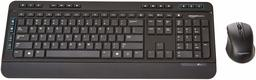

Questions and Answers:
Q: Is there a keyboard?
A: yes
Q: What color is the mouse?
A: black
Q: Is there a numberpad?
A: yes
Q: How many windows keys are there?
A: 2
Q: What layout is the keyboard?
A: qwerty
Q: Are there media keys?
A: yes
Q: What is the keyboard size?
A: full
Q: What kind of combo is it?
A: keyboard

--------------------------------------------------



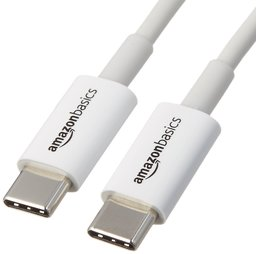

Questions and Answers:
Q: What is the cable's color?
A: white
Q: Is there a logo present?
A: yes
Q: What is the brand name?
A: amazonbasics
Q: What type of connector is shown?
A: type-c
Q: Are there two cables?
A: no
Q: What is the cable's material?
A: plastic
Q: Is the background visible?
A: yes

--------------------------------------------------

Category: TOOLS


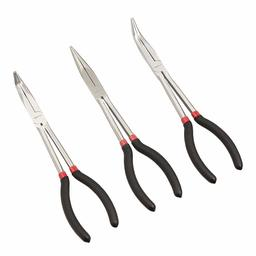

Questions and Answers:
Q: How many tools are present?
A: 3
Q: Are the pliers open?
A: yes
Q: What color are the handles?
A: red
Q: Is this a set?
A: yes
Q: What type of tool are these?
A: pliers
Q: What is the material?
A: metal
Q: Are the tools new?
A: no
Q: What is the brand?
A: amazonbasics

--------------------------------------------------



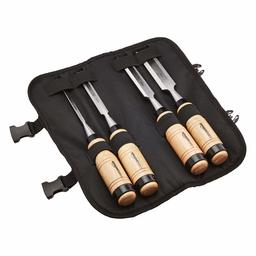

Questions and Answers:
Q: Are the tools in a case?
A: yes
Q: What is the handle color?
A: wooden
Q: How many tools are present?
A: 4
Q: What is the case's color?
A: black
Q: Are the tools wrapped?
A: yes
Q: Is the image indoors?
A: yes
Q: What material is the case made of?
A: fabric
Q: Are the tool tips metal?
A: yes
Q: Is there a buckle?
A: yes
Q: What is contained inside?
A: chisels

--------------------------------------------------

Category: SUITCASE


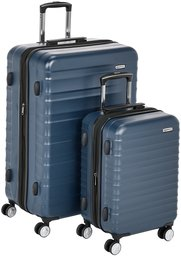

Questions and Answers:
Q: How many suitcases are shown?
A: 2
Q: Are the suitcases blue?
A: yes
Q: Is the background white?
A: yes
Q: Are there wheels on the suitcases?
A: yes
Q: Do the suitcases have handles?
A: yes
Q: What is the material of the suitcases?
A: plastic
Q: Is the small suitcase in front?
A: yes
Q: Are the suitcases closed?
A: yes
Q: What is the color of the wheels?
A: gray
Q: Is there a zipper?
A: yes

--------------------------------------------------



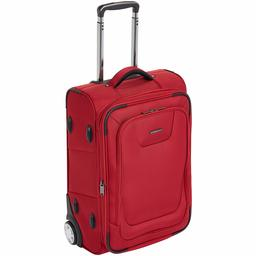

Questions and Answers:
Q: What color is the suitcase?
A: red
Q: Are there wheels visible?
A: yes
Q: Is the handle extended?
A: yes
Q: What is the suitcase's material?
A: fabric
Q: Is there a zipper?
A: yes
Q: How many wheels are visible?
A: 2
Q: Is the bag upright?
A: yes
Q: Does the suitcase have a handle?
A: yes
Q: What is the handle's color?
A: silver
Q: Is there a front pocket?
A: yes

--------------------------------------------------

Category: STOOL_SEATING


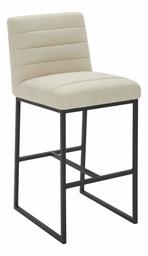

Questions and Answers:
Q: What color is the barstool?
A: hemp
Q: Is the chair armless?
A: yes
Q: What is material of frame?
A: metal
Q: What shape are the barstool legs?
A: square
Q: How many crossbars exist?
A: 1
Q: Is the stool backed?
A: yes
Q: What is the scene?
A: indoor
Q: Is the seat plush?
A: yes
Q: What type of upholstery is present?
A: neutral
Q: Is this furniture?
A: yes

--------------------------------------------------



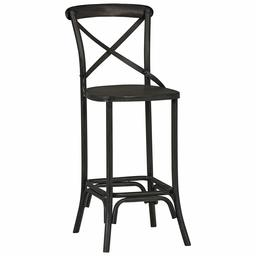

Questions and Answers:
Q: What shape is on the chair back?
A: x
Q: What material is the stool made of?
A: metal
Q: Is the chair back open?
A: yes
Q: What is the stool's color?
A: nickel
Q: What kind of furniture is this?
A: stool
Q: How many legs does the stool have?
A: 4
Q: Is the chair standing?
A: yes
Q: What is the setting?
A: indoor

--------------------------------------------------

Category: SPORTING_GOODS


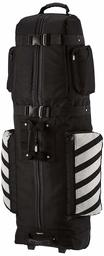

Questions and Answers:
Q: What color is the travel bag?
A: black
Q: Are there wheels present?
A: yes
Q: Are there zippers present?
A: yes
Q: What is the bag's material?
A: fabric
Q: What pattern are the bags?
A: stripes
Q: Is there a handle?
A: yes
Q: How many buckles are visible?
A: 2
Q: What is the travel bag's purpose?
A: golf
Q: Is this indoors or outdoors?
A: indoors
Q: How many pockets are present?
A: 4

--------------------------------------------------



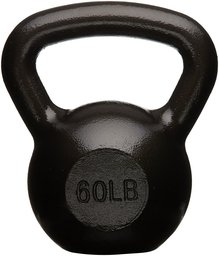

Questions and Answers:
Q: What is the weight on the kettlebell?
A: 60lb
Q: What color is the kettlebell?
A: black
Q: Is there a handle?
A: yes
Q: What object is pictured?
A: kettlebell
Q: What unit is the weight in?
A: lb

--------------------------------------------------

Category: SOFA


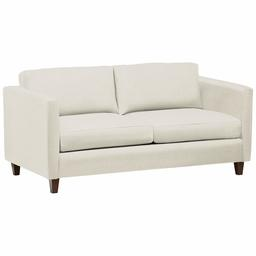

Questions and Answers:
Q: What color is the loveseat?
A: sand
Q: Are there arms on the couch?
A: yes
Q: How many cushions are there?
A: 2
Q: Is there furniture present?
A: yes
Q: Are the legs dark?
A: yes
Q: Is the background white?
A: yes
Q: Is this a loveseat?
A: yes
Q: What shape are the legs?
A: square
Q: Is the sofa new?
A: yes
Q: Is the sofa clean?
A: yes

--------------------------------------------------



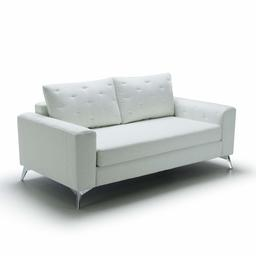

Questions and Answers:
Q: What color is the sofa?
A: white
Q: Does the sofa have pillows?
A: yes
Q: Are legs visible on the sofa?
A: yes
Q: What is the sofa's setting?
A: indoors
Q: Are buttons on the pillows?
A: yes
Q: Is the backdrop plain?
A: yes
Q: How many pillows are there?
A: 2
Q: Is the sofa new?
A: yes
Q: Is there a shadow?
A: yes
Q: What is the sofa's material?
A: leather

--------------------------------------------------

Category: SHOES


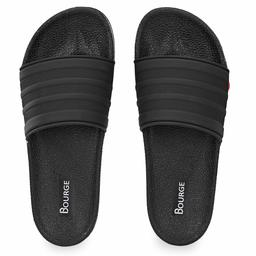

Questions and Answers:
Q: What color are the shoes?
A: black
Q: Are both shoes facing upwards?
A: yes
Q: What is the shoe's brand?
A: bourge
Q: What type of footwear is shown?
A: sliders
Q: Is there any red on the shoes?
A: yes
Q: Are the shoes indoor?
A: no
Q: Is the background white?
A: yes
Q: What is the shoe's material?
A: synthetic
Q: Are the shoes new?
A: yes
Q: What is the product's type?
A: shoes

--------------------------------------------------



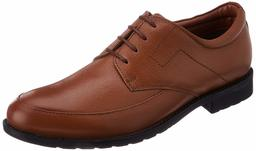

Questions and Answers:
Q: What is the shoe material?
A: leather
Q: What color are the shoes?
A: tan
Q: Are laces visible?
A: yes
Q: How many shoes are present?
A: 1
Q: What is the sole color?
A: black
Q: What is the shoe style?
A: derby
Q: Is shoe shiny?
A: yes
Q: What is the shoe's closure type?
A: lace

--------------------------------------------------

Category: KITCHEN


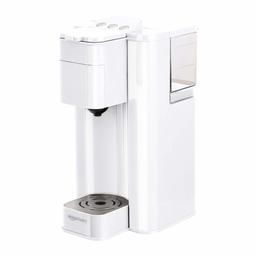

Questions and Answers:
Q: What color is the appliance?
A: white
Q: Is there a drip tray?
A: yes
Q: What material is the drip tray?
A: plastic
Q: Is the appliance plugged in?
A: no
Q: What is the product category?
A: kitchen
Q: What type of maker is it?
A: coffee
Q: How many buttons are on top?
A: 3
Q: What is the brand?
A: amazonbasics

--------------------------------------------------



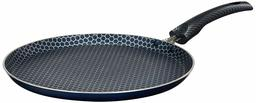

Questions and Answers:
Q: Is the pan black?
A: yes
Q: What material is the handle?
A: plastic
Q: What shape is the pan?
A: round
Q: Is there a handle?
A: yes
Q: What is on the pan surface?
A: pattern
Q: What is the coating?
A: nonstick
Q: What color is the pan rim?
A: black

--------------------------------------------------

Category: JANITORIAL_SUPPLY


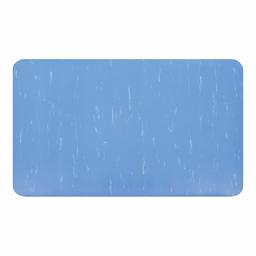

Questions and Answers:
Q: What is the color of the mat?
A: blue
Q: Is the shape rectangular?
A: yes
Q: Are there any rounded corners?
A: yes
Q: Is there white on the mat?
A: yes
Q: What is the mat's texture?
A: marbleized
Q: Is this mat solid?
A: no
Q: Is this an indoor mat?
A: yes
Q: Is it thick?
A: yes
Q: Is it anti-fatigue?
A: yes
Q: What brand is this mat?
A: amazonbasics

--------------------------------------------------



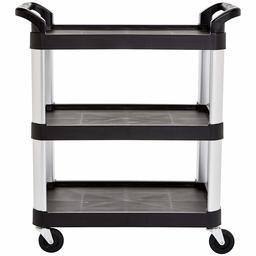

Questions and Answers:
Q: What color are the shelves?
A: black
Q: Are wheels visible?
A: yes
Q: How many shelves are there?
A: 3
Q: What color are the legs?
A: silver
Q: Is there a handle?
A: yes
Q: Is this cart on wheels?
A: yes
Q: What shape are the wheels?
A: round
Q: What material is the cart?
A: plastic
Q: What color is the cart?
A: black
Q: Is the background white?
A: yes

--------------------------------------------------

Category: HOME_FURNITURE_AND_DECOR


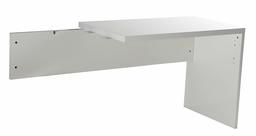

Questions and Answers:
Q: Is this mounted?
A: yes
Q: What is the shelf's color?
A: white
Q: Is there a bottom piece?
A: yes
Q: What shape is the shelf?
A: l
Q: What is being shown?
A: shelf
Q: How many panels connect the shelf?
A: 2
Q: Is it fixed?
A: yes
Q: Is this furniture?
A: yes

--------------------------------------------------



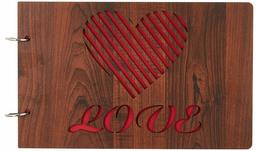

Questions and Answers:
Q: What is the album's cover material?
A: wood
Q: Is there a heart shape?
A: yes
Q: What is the color of the album?
A: brown
Q: What word is written on the album?
A: love
Q: Are there rings on the side?
A: yes
Q: What shape is above the word?
A: heart
Q: Are photos inside the album?
A: no
Q: How many rings are visible?
A: 2
Q: Is the background solid?
A: no
Q: What is the album used for?
A: memories

--------------------------------------------------

Category: HOME_BED_AND_BATH


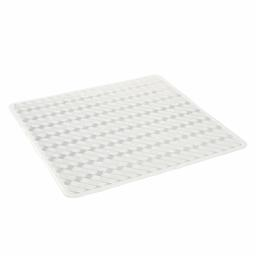

Questions and Answers:
Q: Is the object square?
A: yes
Q: What is the mat made of?
A: rubber
Q: Is the mat white?
A: yes
Q: Is there a pattern?
A: yes
Q: Is this for a bathtub?
A: yes
Q: What is this item?
A: mat
Q: What shape are the pattern elements?
A: diamond
Q: What is the color?
A: white
Q: Does the mat have texture?
A: yes
Q: Is the item new?
A: yes

--------------------------------------------------



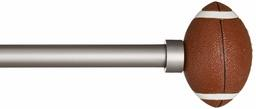

Questions and Answers:
Q: What is the shape of the rod end?
A: football
Q: Is this object for a kid?
A: yes
Q: What is the color of the rod?
A: silver
Q: Is the rod horizontal?
A: yes
Q: Is this an indoor object?
A: yes
Q: Is the football striped?
A: yes
Q: What is this object used for?
A: curtain
Q: How many colors are present?
A: 2
Q: Is the football roundish?
A: yes
Q: What is the rod's material?
A: metal

--------------------------------------------------

Category: HAT


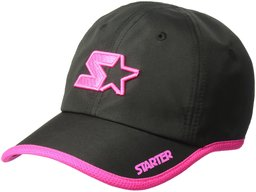

Questions and Answers:
Q: What color is the hat?
A: black
Q: Is there a logo on the hat?
A: yes
Q: What shape is in the logo?
A: star
Q: What color is the logo?
A: pink
Q: What does the hat say?
A: starter
Q: What material is the hat?
A: polyester
Q: Is this hat for running?
A: yes
Q: Is the brim curved?
A: yes
Q: What is the hat's style?
A: baseball

--------------------------------------------------



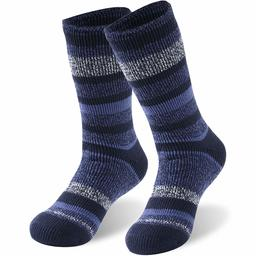

Questions and Answers:
Q: What color are the socks?
A: blue
Q: Are the socks striped?
A: yes
Q: What material are the socks?
A: fur
Q: How many socks are there?
A: 2
Q: Is there white color?
A: yes
Q: What is the socks style?
A: boot
Q: Are the socks folded?
A: no
Q: What is the sock's pattern?
A: stripes
Q: Are these socks unisex?
A: yes
Q: Is this footwear?
A: yes

--------------------------------------------------

Category: HANDBAG


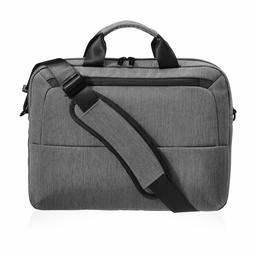

Questions and Answers:
Q: What is the material color?
A: gray
Q: Is there a strap?
A: yes
Q: What is the bag type?
A: handbag
Q: What is the bag's closure?
A: none
Q: What color is the trim?
A: black
Q: Is the bag padded?
A: yes
Q: How many handles are visible?
A: 1
Q: What is the bag's style?
A: business

--------------------------------------------------



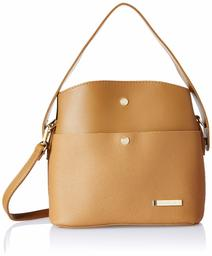

Questions and Answers:
Q: What color is the handbag?
A: camel
Q: Is there a handle on the bag?
A: yes
Q: What is the bag's material?
A: leather
Q: What item is this?
A: handbag
Q: How many buttons are visible?
A: 2
Q: Is the bag indoors?
A: no
Q: What is the brand?
A: flavia
Q: What type of bag is this?
A: top-handle
Q: What is the gender?
A: women

--------------------------------------------------

Category: FINENECKLACEBRACELETANKLET


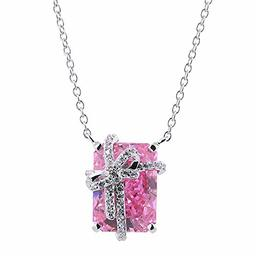

Questions and Answers:
Q: What color is the large gemstone?
A: pink
Q: Is there a bow on the pendant?
A: yes
Q: What is the chain made of?
A: silver
Q: What is the chain's material plated with?
A: platinum
Q: Is this jewelry a necklace?
A: yes
Q: What is the bow made of?
A: silver
Q: Is the gemstone rectangular?
A: yes
Q: Is the background white?
A: yes

--------------------------------------------------



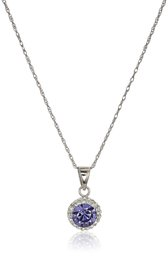

Questions and Answers:
Q: What color is the pendant's crystal?
A: purple
Q: Is there a chain?
A: yes
Q: What is the chain made of?
A: silver
Q: Is the pendant round?
A: yes
Q: Are there stones around the center stone?
A: yes
Q: What is the necklace's style?
A: pendant
Q: Is the necklace on a person?
A: no
Q: Is the necklace displayed?
A: yes
Q: What is the chain's texture?
A: twisted

--------------------------------------------------



In [11]:
display_images_with_qa(df, num_images=2)